#### Laboratorium 10 - zadania

Detektor obiektów oparty na HOG co do zasady działania przypomina znany Ci już detektor Viola-Jones:
* dla każdego potencjalnego rejonu zainteresowania:
* ekstrahujemy cechy za pomocą deskryptora HOG,
* wykorzystujemy jakiś klasyfikator (np. SVM) do wykonania predykcji,
* zapisujemy znalezione wystąpienia obiektów.

Ponieważ na dzisiejszych zajęciach nie będziemy mieli czasu ani zasobów na nikopoziomowe odtworzenie całej ścieżki z takim detektorem, skupimy się najpierw na samym deskryptorze a potem przetestujemy gotowy detektor.

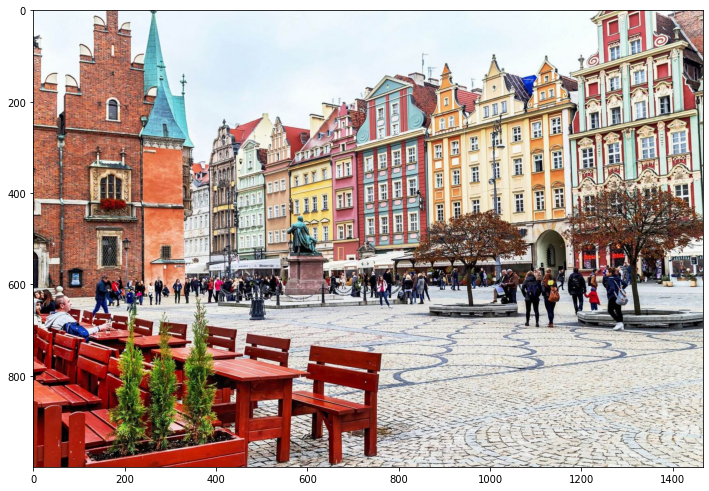

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

rynek = cv2.imread('rynek.jpg')
plt.subplots(1, 1, figsize=(12, 12))[1].imshow(rynek[..., ::-1]);

Przykładowe rejony zainteresowania, dane jako koordynaty punktów stanowiący lewy-górny narożnik prostokąta o wymiarach 64x128:

In [2]:
# pozytywne
xy1 = (1058, 567)
xy2 = (1155, 550)
# negatywne
xyN = (656, 752)

#### Zadanie 1 (2.0 pkt | 1.0 pkt)

W tym zadaniu przećwiczysz (w niewielkim uproszczeniu) podstawową koncepcję detektora HOG. Kroki a-c powtórz dla różnych ROI, porównując wyniki.

#### Zadanie 1a (0.5 pkt | 0.0 pkt)

Wykonaj obrazy gradientów dla wybranego ROI a następnie przekształć je do postaci biegunowej. Pamiętaj o konwersji do skali szarości.

#### Zadanie 1b (1.0 pkt | 0.5 pkt)

Wykorzystując podany fragment do iteracji po "komórkach" obrazu, znajdź dominujący kierunek gradientu w każdej komórce. Możesz, ale nie musisz stosować finezyjnej interpolacji w zgodzie z literaturą.

In [3]:
def get_cell(image:np.ndarray, cx:int, cy:int):
    return image[cy*8:cy*8+8, cx*8:cx*8+8]

#### Zadanie 1c (0.5 pkt | 0.5pkt)

Poniższy snippet rysuje linię o podanym kierunku w podanej komórce. Utwórz za jego pomocą wykres dominujących kierunków na przestrzeni obrazu. Tip: skonwertuj obraz do skali szarości i rysuj linie jaskrawym kolorem dla lepszej widoczności.

In [4]:
def draw_orientation(cell, angle, color):
    d = 3.5
    lca = d * cos(radians(angle))
    lsa = d * sin(radians(angle))
    p1 = int(3 - lca), int(3 - lsa)
    p2 = int(3 + lca), int(3 + lsa)
    cv2.line(cell, p1, p2, color=color, thickness=1)
    return cell

---

#### Zadanie 2 (1.0 pkt | 1.0 pkt)

Przetestuj implementację **detektora** HOG z OpenCV na dołączonych obrazach (`rynek` i `ulica`). Domyślny konstruktor [cv2.HOGDetector](https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html#a5c8e8ce0578512fe80493ed3ed88ca83) tworzy detektor wg parametryzacji z oryginalnej publikacji - pozostań przy tych wartościach.

Pamiętaj, że detektor HOG integruje deskryptor (metoda [`compute`](https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html#a38cd712cd5a6d9ed0344731fcd121e8b)) oraz bazujący na podejściu sliding-window i klasyfikatorze SVM detektor (metoda [`detect`](https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html#a5851df61c5b95391533144c078403672) i podobne).

Aby uzyskać podstawowy detektor wstępnie nauczony detekcji sylwetek, możesz uzyskać domyślne parametry klasyfikatora za pomocą funkcji [`cv2.HOGDescriptor_getDefaultPeopleDetector`](https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html#a9c7a0b2aa72cf39b4b32b3eddea78203) i załadować je do instancji HOGa za pomocą metody [`setSVMDetector`](https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html#a6de5ac55631eed51e36278cde3a2c159).

Pytania: *skąd się biorą fałszywe pozytywy?*, *jaki jest wpływ skali?*

Jeśli starczy czasu: zapoznaj się i przetestuj metodę [`detectMultiScale`](https://docs.opencv.org/4.x/d5/d33/structcv_1_1HOGDescriptor.html#a91e56a2c317392e50fbaa2f5dc78d30b).

In [5]:
ulica = cv2.imread('ulica.jpg')